## Open the data files:

In [117]:
with open("diabetes.txt") as d:
    lst=list(d)
    
with open("diabetes_scale.txt") as ds:
    lsts=list(ds)
    
for row in lsts[:10]:
    print(row)

-1 1:-0.294118 2:0.487437 3:0.180328 4:-0.292929 5:-1 6:0.00149028 7:-0.53117 8:-0.0333333 

+1 1:-0.882353 2:-0.145729 3:0.0819672 4:-0.414141 5:-1 6:-0.207153 7:-0.766866 8:-0.666667 

-1 1:-0.0588235 2:0.839196 3:0.0491803 4:-1 5:-1 6:-0.305514 7:-0.492741 8:-0.633333 

+1 1:-0.882353 2:-0.105528 3:0.0819672 4:-0.535354 5:-0.777778 6:-0.162444 7:-0.923997 8:-1 

-1 1:-1 2:0.376884 3:-0.344262 4:-0.292929 5:-0.602837 6:0.28465 7:0.887276 8:-0.6 

+1 1:-0.411765 2:0.165829 3:0.213115 4:-1 5:-1 6:-0.23696 7:-0.894962 8:-0.7 

-1 1:-0.647059 2:-0.21608 3:-0.180328 4:-0.353535 5:-0.791962 6:-0.0760059 7:-0.854825 8:-0.833333 

+1 1:0.176471 2:0.155779 3:-1 4:-1 5:-1 6:0.052161 7:-0.952178 8:-0.733333 

-1 1:-0.764706 2:0.979899 3:0.147541 4:-0.0909091 5:0.283688 6:-0.0909091 7:-0.931682 8:0.0666667 

-1 1:-0.0588235 2:0.256281 3:0.57377 4:-1 5:-1 6:-1 7:-0.868488 8:0.1 



## Data cleaning and processing:

In [118]:
database = []
for row in lsts:
    
    #row_break is a list by breaking row into a list of string elements 
    row_break = row.split()
    ### for example: ['-1','1:-0.294118',...,'8:-0.0333333']
    
    data = [int(row_break[0])]#adding to this empty list
    
    row_break = row_break[1:]
    for i in range(0,8): #8 cannot be replaced bylen(row_break)  # i = 0 to 7
        strings = row_break[0].split(":") #strings is a LIST of strings
        #print(strings)
        
        if strings[0] == str(i+1): #no empty spot at i
            data.append(float(strings[1]))
            del row_break[0]
            if row_break == []:
                row_break = ["2333"]
            
        else:
            data.append(0)
        
    #print(data)
    database.append(data)
    

print("All rows of data have been processed:",len(database)==len(lsts))

#check and comapre special rows:
print(database[24])
print(lsts[24])

print(database[401])
print(lsts[401])

All rows of data have been processed: True
[-1, 0.294118, 0.437186, 0.540984, -0.333333, -0.654846, 0.0909091, -0.849701, 0]
-1 1:0.294118 2:0.437186 3:0.540984 4:-0.333333 5:-0.654846 6:0.0909091 7:-0.849701 

[1, -0.294118, 0.376884, 0, -1.0, -1.0, -0.278688, -0.93766, 0.133333]
+1 1:-0.294118 2:0.376884 4:-1 5:-1 6:-0.278688 7:-0.93766 8:0.133333 



## Prepare the data for numpy:

In [119]:
import numpy as np

y1 = np.array(database[0][0])
print(y1)

x1 = np.array(database[0][1:])
print(x1)

-1
[-0.294118    0.487437    0.180328   -0.292929   -1.          0.00149028
 -0.53117    -0.0333333 ]


In [120]:
pair_list = [] #list of tuples

d = database.copy()

for data in d: 
    y = data.pop(0)
    data.append(1) #add one extra dimension to x with value 1 (to multiply with bias b)
    x = data
    x_array = np.array(x)
    pair = (y, x_array)
    pair_list.append(pair)

In [121]:
#checking the length of datasheet
len(pair_list)

768

In [124]:
#checking a row of interest
print(pair_list[401])

(1, array([-0.294118,  0.376884,  0.      , -1.      , -1.      , -0.278688,
       -0.93766 ,  0.133333,  1.      ]))


In [126]:
#initialize a vector w of shape(9,)
#Please note this w contains 8 weight term and 1 bias term
w = np.random.uniform(1e-5,5e-5,9)

In [127]:
w

array([2.12800782e-05, 4.23341288e-05, 2.81814433e-05, 2.99791637e-05,
       1.37637098e-05, 3.14029240e-05, 1.06198051e-05, 1.05726392e-05,
       4.55241258e-05])

In [128]:
import random
#help(random.sample)

Bisect the dataset randomly into training set and testing set:

In [129]:
train_size = round(2*len(pair_list)/3)
test_size = len(pair_list) - train_size

index = list(range(len(pair_list)))
train_index = random.sample(index, train_size)

train = []
test=[]

for i in range(len(pair_list)):
    if i in train_index:
        train.append(pair_list[i])
    else:
        test.append(pair_list[i])

In [130]:
type(train),type(test)

(list, list)

In [131]:
train[0],test[0]

((-1, array([-0.294118  ,  0.487437  ,  0.180328  , -0.292929  , -1.        ,
          0.00149028, -0.53117   , -0.0333333 ,  1.        ])),
 (-1, array([-0.0588235,  0.839196 ,  0.0491803, -1.       , -1.       ,
         -0.305514 , -0.492741 , -0.633333 ,  1.       ])))

In [132]:
len(train), len(test)

(512, 256)

In [133]:
#showing first 10 rows of training set
train[:10]

[(-1, array([-0.294118  ,  0.487437  ,  0.180328  , -0.292929  , -1.        ,
          0.00149028, -0.53117   , -0.0333333 ,  1.        ])),
 (1, array([-0.882353 , -0.145729 ,  0.0819672, -0.414141 , -1.       ,
         -0.207153 , -0.766866 , -0.666667 ,  1.       ])),
 (1, array([-0.882353 , -0.105528 ,  0.0819672, -0.535354 , -0.777778 ,
         -0.162444 , -0.923997 , -1.       ,  1.       ])),
 (1, array([-0.411765,  0.165829,  0.213115, -1.      , -1.      , -0.23696 ,
         -0.894962, -0.7     ,  1.      ])),
 (-1, array([-0.647059 , -0.21608  , -0.180328 , -0.353535 , -0.791962 ,
         -0.0760059, -0.854825 , -0.833333 ,  1.       ])),
 (1, array([ 0.176471,  0.155779, -1.      , -1.      , -1.      ,  0.052161,
         -0.952178, -0.733333,  1.      ])),
 (-1, array([-0.0588235,  0.256281 ,  0.57377  , -1.       , -1.       ,
         -1.       , -0.868488 ,  0.1      ,  1.       ])),
 (-1, array([ 0.176471,  0.688442,  0.213115, -1.      , -1.      ,  0.132638,
   

Introducing a "toy" training set containing only 10 "toy" samples with the same structure but lower dimensions:

In [134]:
train_toy = [(-1, np.array([-0.294118,  0.058,0,0, 0,
          0.00, 0   ,0 ,  1.        ])),
 (-1, np.array([-0.882353 , -0.145729 ,  0, 0 , 0,
         0 , 0 , 0 ,  1.       ])),
 (1, np.array([-0.0588235,  0.839196 ,  0, 0, 0,
         0 , 0 , 0 ,  1.       ])),
 (-1, np.array([-0.87 , -0.105528 ,  0, 0 , 0 ,
         0 , 0 , 0       ,  1.       ])),
 (-1, np.array([-1.,  0.376884, 0, 0, 0,  0 ,
          0, 0    ,  1.      ])),
 (-1, np.array([0.11765,  -0.165829,  0,0,0,0 ,
         0, 0    ,  1.      ])),
 (1, np.array([ 0.176471,  0.155779, 0, 0, 0, 0,
         0, 0,  1.      ])),
 (1, np.array([-0.764706 ,  0.979899 , 0 , 0, 0 ,
         0, 0 , 0,  1.       ])),
 (-1, np.array([0.0588235,  -0.256281 ,0  , 0,0,
         0, 0 ,  0,  1])),
 (1, np.array([ 0.176471,  0.688442,  0,0, 0, 0,
         0, 0,  1.      ]))]

train_toy_toy = [(-1, np.array([-0.294118  ,  0.058  ,  0  ,0  , 0.        ,
          0.00, 0   ,0 ,  1.        ])),
 (-1, np.array([-0.882353 , -0.145729 ,  0, 0 , 0       ,
         0 , 0 , 0 ,  1.       ])),
 (1, np.array([0.588235,  0.839196 ,  0, 0       , 0      ,
         0 , 0 , 0 ,  1.       ]))]

test_toy_toy = [(-1, np.array([-0.6  ,  0.4  ,  0  ,0  , 0.        ,
          0.00, 0   ,0 ,  1.        ])),
 (-1, np.array([-0.7 , -0.3 ,  0, 0 , 0       ,
         0 , 0 , 0 ,  1.       ])),
 (1, np.array([0.588235,  0.4 ,  0, 0       , 0      ,
         0 , 0 , 0 ,  1.       ])),
 (-1, np.array([-0.2 , -0.18 ,  0, 0 , 0 ,
         0 , 0 , 0       ,  1.       ])),
 (-1, np.array([-0.2      , -0.376884, 0, 0, 0,  0 ,
          0, 0    ,  1.      ])),
 (-1, np.array([-0.52,  0.3,  0,0      ,0      ,0 ,
         0, 0    ,  1.      ])),
 (1, np.array([ 0.66,  0.233, 0      , 0      , 0      , 0,
         0, 0,  1.      ])),
 (-1, np.array([-0.764706 ,  0.079899 , 0 , 0, 0 ,
         0, 0 , 0,  1.       ])),
 (-1, np.array([-0.6,  0.3 ,  0  , 0       ,0       ,
         0      , 0 ,  0     ,  1.       ])),
 (1, np.array([ 0.26,  0.8,  0,0      , 0      , 0,
         0, 0,  1.      ]))]

In [135]:
test_toy = [(-1, np.array([-0.6  ,  0.4  ,  0,0, 0,
          0.00, 0   ,0 ,  1.        ])),
 (-1, np.array([-0.7 , -0.3 ,  0, 0 , 0,
         0 , 0 , 0 ,  1.       ])),
 (1, np.array([0.588235,  0.4 ,  0, 0, 0,
         0 , 0 , 0 ,  1.       ])),
 (-1, np.array([-0.2 , -0.18 ,  0, 0 , 0 ,
         0 , 0 , 0,  1.])),
 (-1, np.array([-0.2, -0.376884, 0, 0, 0,0 ,
          0, 0,  1.])),
 (-1, np.array([-0.52,  0.3,  0,0,0,0 ,
         0, 0,  1])),
 (1, np.array([ 0.66,  0.233, 0, 0, 0, 0,
         0, 0,  1.])),
 (-1, np.array([-0.764706 ,  0.079899 , 0, 0, 0 ,
         0, 0 , 0,  1])),
 (1, np.array([-0.16,  0.3 ,0,0,0,
         0, 0,0,1])),
 (1, np.array([ 0.26,  0.8,0,0,0,0,
         0, 0,1]))]

## Construct the perceptron:

In [136]:
#define the sign function:
def sign(var:float):
    if var>=0:
        return 1
    else:
        return -1

In [137]:
#define the loss function:
def loss(w,pair):
    '''
    w is the array of weights (and one bias term)
    len(w) = 9
    pair = [+/-1 , array]
    pair[1] is an array
    '''
    f = w.dot(pair[1])
    loss = - pair[0]*f
    return loss

In [138]:
#define the gradient loss function:
def gradient_loss(w,pair):
    return -pair[0]*pair[1]

Defining a perceptron for solving a simple (linearly seperable) problem:

In [140]:
def perceptron(train, step):

    #Initialize vector w of shape(9,)
    #Please note this w contains 8 weight term and 1 bias term
    w = np.random.uniform(1e-5,5e-5,9)
     ##w = np.zeros(9,)
        
    flag = True  #guiding the while loop with this flag
    
    while flag:
        #Cost = 0
        count = 0
        for i in range(len(train)):
            xi = train[i][1]
            yi = train[i][0]
            if sign(w.dot(xi) * yi) <= 0:
                w += step*yi*xi
                print(w)
                #Cost+=loss(w,train[i])
                count += 1
                
            ##w = w/np.linalg.norm(w) #normalize w
        if count <1: #i.e. count = 0
            flag = False
        print("Number of false classification:",count)

    return w
    
    


Implementing perceptron():

In [143]:
w=perceptron(train_toy, 0.03)

[ 8.85267477e-03 -1.72927255e-03  3.34822662e-05  4.00447111e-05
  3.77948949e-05  1.47018219e-05  2.38158908e-05  1.31096996e-05
 -2.99870267e-02]
[7.08796977e-03 2.34466075e-02 3.34822662e-05 4.00447111e-05
 3.77948949e-05 1.47018219e-05 2.38158908e-05 1.31096996e-05
 1.29732578e-05]
[ 3.70879698e-02  1.21400875e-02  3.34822662e-05  4.00447111e-05
  3.77948949e-05  1.47018219e-05  2.38158908e-05  1.31096996e-05
 -2.99870267e-02]
[4.23820998e-02 1.68134575e-02 3.34822662e-05 4.00447111e-05
 3.77948949e-05 1.47018219e-05 2.38158908e-05 1.31096996e-05
 1.29732578e-05]
[1.94409198e-02 4.62104275e-02 3.34822662e-05 4.00447111e-05
 3.77948949e-05 1.47018219e-05 2.38158908e-05 1.31096996e-05
 3.00129733e-02]
[1.76762148e-02 5.38988575e-02 3.34822662e-05 4.00447111e-05
 3.77948949e-05 1.47018219e-05 2.38158908e-05 1.31096996e-05
 1.29732578e-05]
Number of false classification: 6
[ 4.76762148e-02  4.25923375e-02  3.34822662e-05  4.00447111e-05
  3.77948949e-05  1.47018219e-05  2.38158908e-05 

In [144]:
#showing the weights (and bias)
w

array([5.29703448e-02, 4.72657075e-02, 3.34822662e-05, 4.00447111e-05,
       3.77948949e-05, 1.47018219e-05, 2.38158908e-05, 1.31096996e-05,
       1.29732578e-05])

Testing this perceptron with testing set test_toy:

In [145]:
#w=perceptron(train_toy, 0.03)
count = 0
for i in range(len(test_toy)):
    print(test_toy[i][0] == sign(w.dot(test_toy[i][1])) )
    if (test_toy[i][0] == sign(w.dot(test_toy[i][1])) ):
        count+=1
accu = count / len(test_toy)
print("accuracy is:",accu)

True
True
True
True
True
True
True
True
True
True
accuracy is: 1.0


## Plot graphs:

In [146]:
import matplotlib.pyplot as plt 

In [147]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Text(0.5,1,'hyperplane')

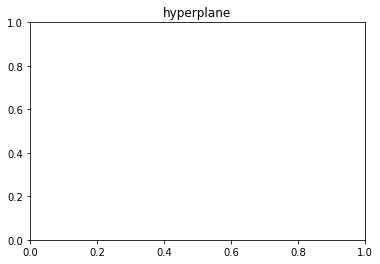

In [148]:
plt.title('hyperplane')

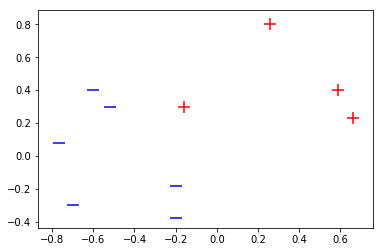

In [157]:
for i in range(len(test_toy)):
    plt.scatter(test_toy[i][1][0],test_toy[i][1][1], c = 'r' if test_toy[i][0] == 1 else 'b', marker =  '+' if test_toy[i][0] == 1 else '_', s = 150)

Plotting the hyperplane:

D:\WAY\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


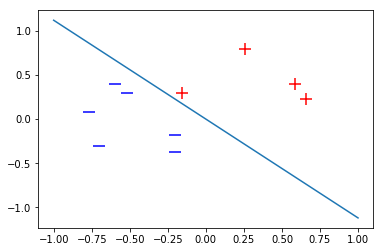

In [158]:
# w1*x1 + w2*x2 + b = 0
w1 = w[0]
w2 = w[1]
b = w[-1]
axes = plt.axes()
for i in range(len(test_toy)):
    axes.scatter(test_toy[i][1][0],test_toy[i][1][1], c = 'r' if test_toy[i][0] == 1 else 'b', marker =  '+' if test_toy[i][0] == 1 else '_', s = 150)
x1 = np.linspace(-1, 1, 100)
x2 = -w1*x1/w2 + b
#axes.plot(x1, x2)
plt.axes().plot(x1,x2)

plt.savefig('test_result_of_toy_model.png',dpi=75)

D:\WAY\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


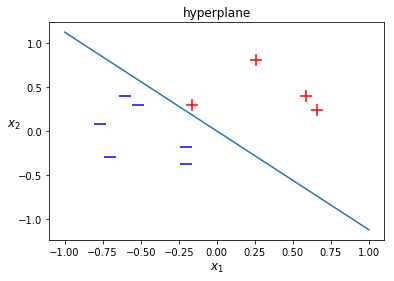

In [159]:
fig2 = plt.figure()
plt.title('hyperplane')
plt.xlabel('$x_{1}$', size=12)
plt.ylabel('$x_{2}$', size=12, rotation = 0)

# w1*x1 + w2*x2 + b = 0
w1 = w[0]
w2 = w[1]
b = w[-1]
axes = plt.axes()
for i in range(len(test_toy)):
    axes.scatter(test_toy[i][1][0],test_toy[i][1][1], c = 'r' if test_toy[i][0] == 1 else 'b', marker =  '+' if test_toy[i][0] == 1 else '_', s = 150)
x1 = np.linspace(-1, 1, 100)
x2 = -w1*x1/w2 + b
#axes.plot(x1, x2)
plt.axes().plot(x1,x2)

plt.savefig('test_result_of_toy_model2.png',dpi=75)

## The perceptron suitable for our entire database:

In [160]:
def perceptron(train, step:float, iterations:int):
    """
    step is the step size (0<step<=1)
    iterations is the max number of loops
    """
    #Initialize vector w of shape(9,)
    #Please note this w contains 8 weight term and 1 bias term
    w = np.random.uniform(1e-5,5e-5,9)
    flag = True
    count_list=[] # the counts of false classifications for each loop
    
    while flag:
        
        count = 0
        for i in range(len(train)):
            xi = train[i][1]
            yi = train[i][0]
            if sign(w.dot(xi) * yi) <= 0:
                w += step*yi*xi
                
                count += 1
                
            #w = w/np.linalg.norm(w) #normalize w
        if (count < len(train)/50) or (len(count_list)==iterations):
        #also exiting loop if max iteration reached:
            flag = False
            
        print("Number of false classification(s):",count)
        #print("w:",w)
        
        count_list.append(count)

    return w

Training and testing the perceptron:

In [163]:
w=perceptron(train, 0.03,1000)
count = 0
for i in range(len(test)):
    #print(test[i][0] == sign(w.dot(test[i][1])) )
    if (test[i][0] == sign(w.dot(test[i][1])) ):
        count+=1
accu = count / len(test)
print("accuracy:",accu)

Number of false classification(s): 162
Number of false classification(s): 143
Number of false classification(s): 144
Number of false classification(s): 156
Number of false classification(s): 156
Number of false classification(s): 147
Number of false classification(s): 153
Number of false classification(s): 161
Number of false classification(s): 147
Number of false classification(s): 146
Number of false classification(s): 156
Number of false classification(s): 160
Number of false classification(s): 146
Number of false classification(s): 142
Number of false classification(s): 150
Number of false classification(s): 138
Number of false classification(s): 150
Number of false classification(s): 143
Number of false classification(s): 141
Number of false classification(s): 145
Number of false classification(s): 134
Number of false classification(s): 148
Number of false classification(s): 143
Number of false classification(s): 154
Number of false classification(s): 138
Number of false classific

Number of false classification(s): 160
Number of false classification(s): 146
Number of false classification(s): 147
Number of false classification(s): 150
Number of false classification(s): 160
Number of false classification(s): 156
Number of false classification(s): 156
Number of false classification(s): 140
Number of false classification(s): 151
Number of false classification(s): 140
Number of false classification(s): 145
Number of false classification(s): 143
Number of false classification(s): 148
Number of false classification(s): 155
Number of false classification(s): 143
Number of false classification(s): 149
Number of false classification(s): 154
Number of false classification(s): 144
Number of false classification(s): 147
Number of false classification(s): 154
Number of false classification(s): 164
Number of false classification(s): 160
Number of false classification(s): 146
Number of false classification(s): 145
Number of false classification(s): 158
Number of false classific

Number of false classification(s): 159
Number of false classification(s): 148
Number of false classification(s): 144
Number of false classification(s): 146
Number of false classification(s): 141
Number of false classification(s): 153
Number of false classification(s): 154
Number of false classification(s): 150
Number of false classification(s): 148
Number of false classification(s): 155
Number of false classification(s): 141
Number of false classification(s): 136
Number of false classification(s): 149
Number of false classification(s): 156
Number of false classification(s): 155
Number of false classification(s): 143
Number of false classification(s): 138
Number of false classification(s): 158
Number of false classification(s): 152
Number of false classification(s): 142
Number of false classification(s): 149
Number of false classification(s): 148
Number of false classification(s): 149
Number of false classification(s): 141
Number of false classification(s): 141
Number of false classific

Number of false classification(s): 155
Number of false classification(s): 140
Number of false classification(s): 151
Number of false classification(s): 148
Number of false classification(s): 154
Number of false classification(s): 149
Number of false classification(s): 140
Number of false classification(s): 159
Number of false classification(s): 144
Number of false classification(s): 156
Number of false classification(s): 144
Number of false classification(s): 146
Number of false classification(s): 150
Number of false classification(s): 147
Number of false classification(s): 152
Number of false classification(s): 140
Number of false classification(s): 150
Number of false classification(s): 145
Number of false classification(s): 150
Number of false classification(s): 154
Number of false classification(s): 148
Number of false classification(s): 139
Number of false classification(s): 155
Number of false classification(s): 150
Number of false classification(s): 151
Number of false classific